# Importing lirbaries and showing the dataframe:

In [1]:
# importing libraries and reading the csv

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/top-10000-popular-movies-tmdb-05-2023/popular_10000_movies_tmdb.csv')
df

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,758323,The Pope's Exorcist,2023-04-05,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,"Father Gabriele Amorth, Chief Exorcist of the ...",18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103,Inspired by the actual files of Father Gabriel...
1,640146,Ant-Man and the Wasp: Quantumania,2023-02-15,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,Super-Hero partners Scott Lang and Hope van Dy...,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125,Witness the beginning of a new dynasty.
2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,"While working underground to fix a water main,...",100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92,NaN
3,868759,Ghosted,2023-04-18,"['Action', 'Comedy', 'Romance']",English,7.2,652,2791.532,Salt-of-the-earth Cole falls head over heels f...,0,"['Skydance Media', 'Apple Studios']",0,120,Finding that special someone can be a real adv...
4,594767,Shazam! Fury of the Gods,2023-03-15,"['Action', 'Comedy', 'Fantasy', 'Adventure']",English,6.8,1510,2702.593,"Billy Batson and his foster siblings, who tran...",125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130,Oh. My. Gods.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,374473,"I, Daniel Blake",2016-10-21,['Drama'],English,7.7,1220,10.774,"A middle aged carpenter, who requires state we...",0,"['Why Not Productions', 'Wild Bunch', 'Sixteen...",15793051,100,NaN
9996,16774,Hellboy Animated: Sword of Storms,2006-10-28,"['TV Movie', 'Fantasy', 'Animation', 'Action',...",English,6.3,99,12.739,A folklore professor becomes unwittingly posse...,0,"['IDT Entertainment', 'Film Roman']",0,73,NaN
9997,13564,Return to House on Haunted Hill,2007-10-03,"['Horror', 'Thriller']",English,5.6,263,12.769,Eight years have passed since Sara Wolfe and E...,0,"['Dark Castle Entertainment', 'Warner Premiere']",0,81,NaN
9998,482204,My Sister-in-law's Job,2017-08-31,"['Drama', 'Romance']",Korean,5.0,5,10.425,An erotic film that depicts the dangerous rela...,0,[],0,89,NaN


# Which movie has the longest runtime:

In [2]:
# finding movie with the longest runtime in the dataset

longest_runtime = df.loc[df['runtime'].idxmax(), 'title']
longest_runtime_minutes = df.loc[df['runtime'].idxmax(), 'runtime']

print(f'{longest_runtime} is the movie with the longest runtime at {longest_runtime_minutes} minutes.')

Blood Curse is the movie with the longest runtime at 449 minutes.


# Average critique vote count per movie:

In [3]:
# finding average vote count for movies

average_vote_count = round(df['vote_count'].mean())
average_vote_count = '{:,}'.format(average_vote_count)

print(f'On average, there are {average_vote_count} votes per movie.')

On average, there are 1,527 votes per movie.


# Average budget and revenue per movie:

In [4]:
# finding average budget and revenue per movie

average_budget = round(df['budget'].mean())
average_budget = '{:,}'.format(average_budget)

average_revenue = round(df['revenue'].mean())
average_revenue = '{:,}'.format(average_revenue)

print(f'On average, each movie has a budget of ${average_budget} and generates ${average_revenue}.')

On average, each movie has a budget of $19,504,571 and generates $59,769,260.


# Most common movie genre:

In [5]:
# finding which genre has the most movies

genre_count = df['genres'].explode().value_counts()
most_common_genre = genre_count.idxmax()
most_common_genre = most_common_genre.strip("['']")

print(f'{most_common_genre} is the most common movie genre.')

Drama is the most common movie genre.


# Production company that has produced the most movies:

In [6]:
# finding which production company has made the most movies

prod_company_counts = df['production_companies'].explode().value_counts()
prod_company_counts = prod_company_counts.drop('[]')
most_common_prod_company = prod_company_counts.idxmax()
most_common_prod_company = most_common_prod_company.strip("['']")

most_common_prod_company_movies = prod_company_counts.max()

print(f'{most_common_prod_company} is the company that has produced the most movies, with {most_common_prod_company_movies} completed movies.')

Paramount is the company that has produced the most movies, with 60 completed movies.


# Top 10 years with the most movie released:

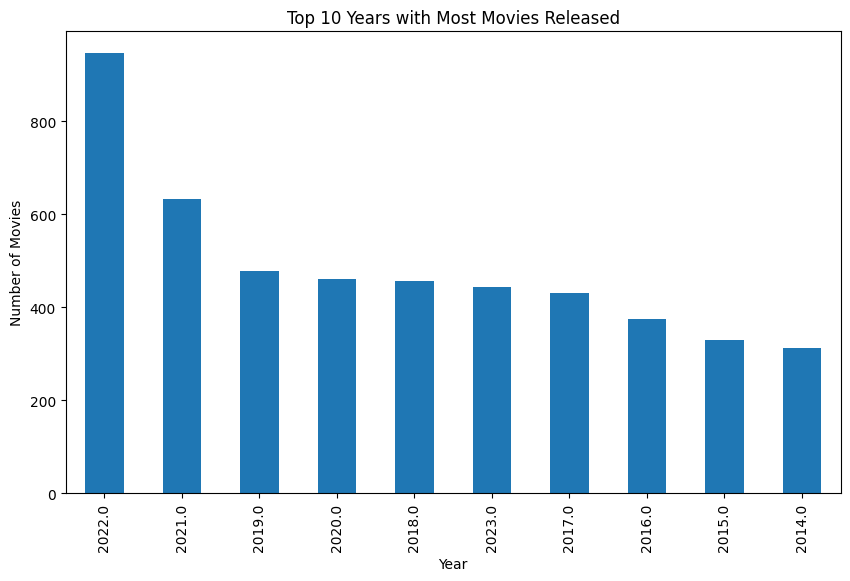

In [7]:
# finding top 10 years with most movies released

df['release_year'] = pd.to_datetime(df['release_date']).dt.year
year_counts = df['release_year'].value_counts().head(10)

plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Top 10 Years with Most Movies Released')
plt.show()

# Distribution of movie runtimes:

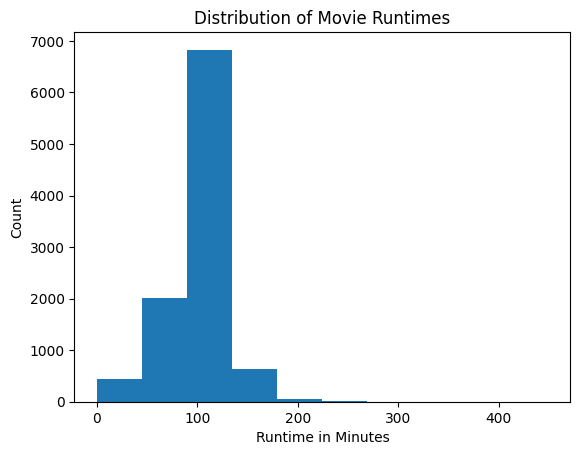

In [8]:
# graphing distribution of movie runtimes

plt.hist(df['runtime'], bins=10)
plt.xlabel('Runtime in Minutes')
plt.ylabel('Count')
plt.title('Distribution of Movie Runtimes')
plt.show()

# Correlation between budget and revenue:

In [9]:
# finding correlation between budget and revenue

correlation = df['budget'].corr(df['revenue'])
rounded_correlation = round(correlation, 2)

print(f"The correlation between budget and revenue is {rounded_correlation}.")
print('This means there is a very strong correlation between how much the movies budget is and how much revenue it will generate.')

The correlation between budget and revenue is 0.74.
This means there is a very strong correlation between how much the movies budget is and how much revenue it will generate.


# Top 10 movies with highest revenue:

In [10]:
# finding top 10 movies by revenue

top_10_revenue = df.nlargest(10, 'revenue')
top_10_revenue['revenue'] = top_10_revenue['revenue'].apply(lambda x: '${:,.0f}'.format(x))
top_10_revenue['title'] = top_10_revenue['title'].str.ljust(50)

top_10_revenue = top_10_revenue.rename(columns={'title': 'Title                                             ', 'revenue': 'Revenue'})

print('Top 10 movies with highest revenue:')
print(top_10_revenue[['Title                                             ', 'Revenue']].to_string(index=False))

Top 10 movies with highest revenue:
Title                                                     Revenue
Avatar                                             $2,923,706,026
Avengers: Endgame                                  $2,794,731,755
Avatar: The Way of Water                           $2,319,331,580
Titanic                                            $2,264,162,353
Star Wars: The Force Awakens                       $2,068,223,624
Avengers: Infinity War                             $2,046,239,637
Spider-Man: No Way Home                            $1,921,847,111
Jurassic World                                     $1,671,537,444
The Lion King                                      $1,663,075,401
The Avengers                                       $1,518,815,515
